<a href="https://colab.research.google.com/github/Tarunsaip/Deep_Learning_NN/blob/master/CNN_char_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install keras-tqdm

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras_tqdm import TQDMNotebookCallback
import cv2

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
train = pd.read_csv('/content/drive/My Drive/emnist-balanced-train.csv')
test = pd.read_csv('/content/drive/My Drive/emnist-balanced-test.csv')
mapping = pd.read_csv("/content/drive/My Drive/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
train.shape ,test.shape, mapping.shape

((112799, 785), (18799, 785), (47,))

In [18]:
x_train , x_test = train.iloc[:,1:] , test.iloc[:, 1:]
x_train.shape , x_test.shape 

((112799, 784), (18799, 784))

In [19]:
y_train , y_test = train.iloc[0:,0] ,test.iloc[0:,0]
y_train.shape , y_test.shape

((112799,), (18799,))

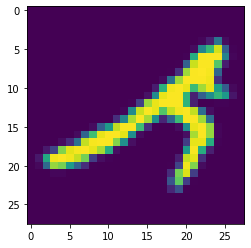

In [20]:
show = x_train.loc[100]
plt.imshow(show.values.reshape(28, 28))

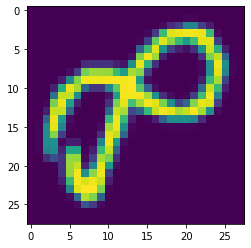

In [21]:
show = x_train.loc[200]
plt.imshow(show.values.reshape(28, 28))

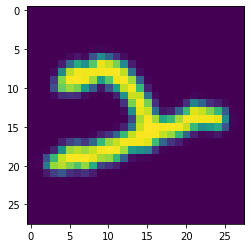

In [22]:
show = x_train.loc[300]
plt.imshow(show.values.reshape(28, 28))

In [23]:
show.shape , show.values

((784,),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   2,   4,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,  16,   7,

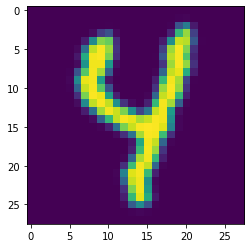

In [24]:
def modify(show):
  x = show.values
  x = x.reshape([28,28])
  x = np.rot90(x)
  x = np.flip(x,0)
  return x
plt.imshow(modify(show))

In [25]:
num = y_train.nunique()

# One Hot Encoding
y_train = np_utils.to_categorical(y_train, num)
y_test = np_utils.to_categorical(y_test, num)

y_train.shape, y_test.shape

((112799, 47), (18799, 47))